Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
print(os.listdir())

['Amazon Sale Report.csv', 'Amazon_sales_report.ipynb', 'Processed_Amazon_Sale_Report.csv']


Loading Data

In [ ]:
data = pd.read_csv('Processed_Amazon_Sale_Report.csv')
print(data.head())

   index             Order ID      Date                        Status  \
0      0  405-8078784-5731545  04-30-22                     Cancelled   
1      1  171-9198151-1101146  04-30-22  Shipped - Delivered to Buyer   
2      2  404-0687676-7273146  04-30-22                       Shipped   
3      3  403-9615377-8133951  04-30-22                     Cancelled   
4      4  407-1069790-7240320  04-30-22                       Shipped   

  Fulfilment Sales Channel ship-service-level  Category Size Courier Status  \
0   Merchant     Amazon.in           Standard   T-shirt    S     On the Way   
1   Merchant     Amazon.in           Standard     Shirt  3XL        Shipped   
2     Amazon     Amazon.in          Expedited     Shirt   XL        Shipped   
3   Merchant     Amazon.in           Standard   Blazzer    L     On the Way   
4     Amazon     Amazon.in          Expedited  Trousers  3XL        Shipped   

   ...  currency  Amount    ship-city   ship-state ship-postal-code  \
0  ...       IN

Handle Missing Data

In [4]:
#Replace missing values
data = data.fillna({
    col: 0 if data[col].dtype in [np.float64, np.int64] else "Unknown"
    for col in data.columns
})



Convert Data Types

In [5]:
data['Date'] = pd.to_datetime(data['Date'], format='%m-%d-%y', errors='coerce') # Convert date column to datetime format

#Convert ship-postal-code to integer (if it exists)
if 'ship-postal-code' in data.columns:
    data['ship-postal-code'] = data['ship-postal-code'].fillna(0).astype(int)



Handle Duplicates

In [6]:
data.drop_duplicates(inplace=True)


Create New Columns

In [7]:
#Add a column to calculate order amount with tax (assuming 18% tax)
if 'Amount' in data.columns:
    data['Order_Amount_with_Tax'] = data['Amount'] * 1.18


Save the Processed Data

In [8]:
output_file_path = 'Processed_Amazon_Sale_Report.csv'  # File will be saved in the current working directory
data.to_csv(output_file_path, index=False)
print(f"Processed data saved to: {output_file_path}")


Processed data saved to: Processed_Amazon_Sale_Report.csv


Load the Data of the Processed File

In [ ]:
import pandas as pd

# Load the data
file_path = "Processed_Amazon_Sale_Report.csv"
data = pd.read_csv(file_path)

# Preview the data
print(data.head())


   index             Order ID        Date                        Status  \
0      0  405-8078784-5731545  2022-04-30                     Cancelled   
1      1  171-9198151-1101146  2022-04-30  Shipped - Delivered to Buyer   
2      2  404-0687676-7273146  2022-04-30                       Shipped   
3      3  403-9615377-8133951  2022-04-30                     Cancelled   
4      4  407-1069790-7240320  2022-04-30                       Shipped   

  Fulfilment Sales Channel ship-service-level  Category Size Courier Status  \
0   Merchant     Amazon.in           Standard   T-shirt    S     On the Way   
1   Merchant     Amazon.in           Standard     Shirt  3XL        Shipped   
2     Amazon     Amazon.in          Expedited     Shirt   XL        Shipped   
3   Merchant     Amazon.in           Standard   Blazzer    L     On the Way   
4     Amazon     Amazon.in          Expedited  Trousers  3XL        Shipped   

   ...  Amount    ship-city   ship-state ship-postal-code ship-country    

Visualization: Sales Trend Over Time

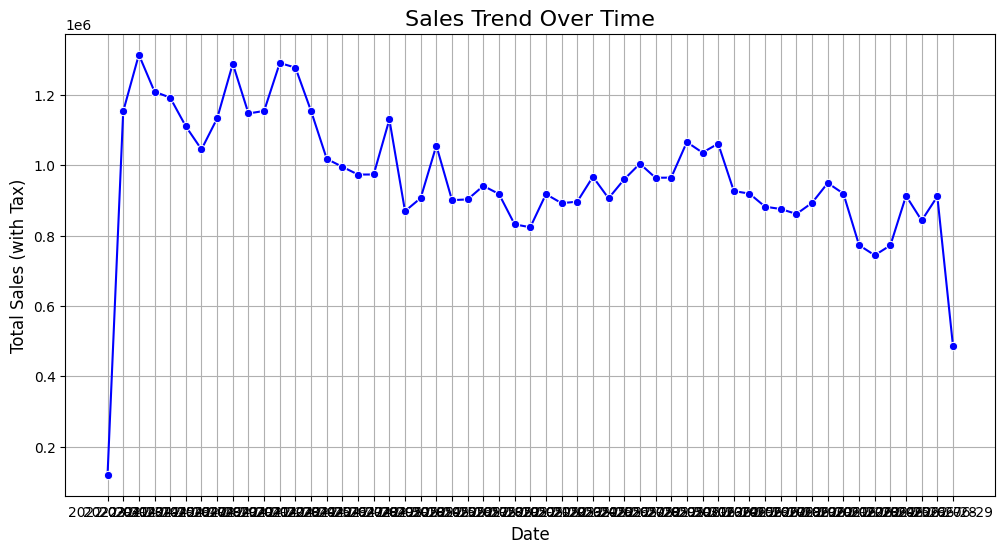

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group data by date to calculate daily sales
sales_trend = data.groupby('Date')['Order_Amount_with_Tax'].sum()

# Plot the sales trend
plt.figure(figsize=(12, 6))
sns.lineplot(x=sales_trend.index, y=sales_trend.values, marker="o", color="blue")
plt.title("Sales Trend Over Time", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Total Sales (with Tax)", fontsize=12)
plt.grid()
plt.show()


Distribution of Order_Amount_with_Tax and Qty

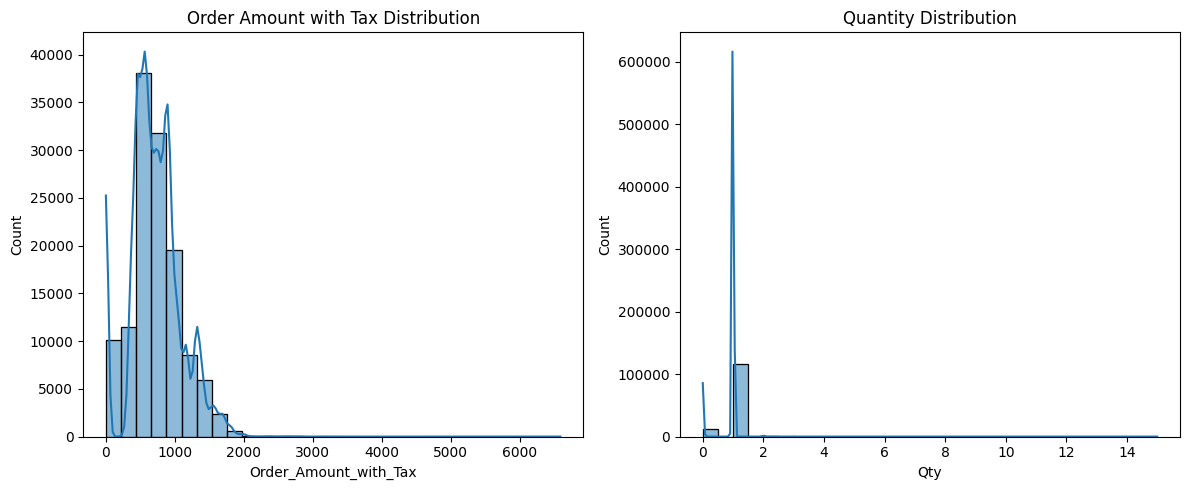

In [11]:
# Distribution plots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(data['Order_Amount_with_Tax'], bins=30, kde=True, ax=axes[0]).set_title('Order Amount with Tax Distribution')
sns.histplot(data['Qty'], bins=30, kde=True, ax=axes[1]).set_title('Quantity Distribution')
plt.tight_layout()
plt.show()


 Product Analysis

C:\Users\kshit\AppData\Local\Temp\ipykernel_28168\1626745001.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette="viridis")


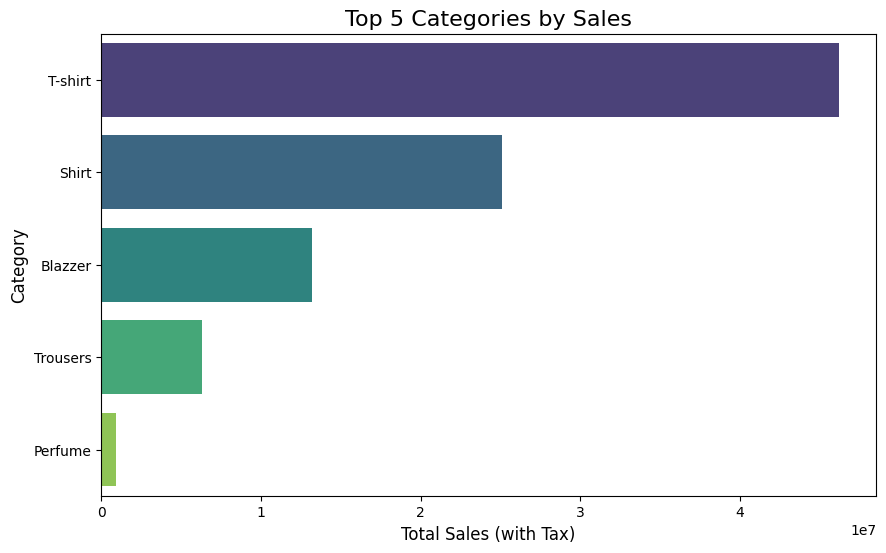

C:\Users\kshit\AppData\Local\Temp\ipykernel_28168\1626745001.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette="coolwarm")


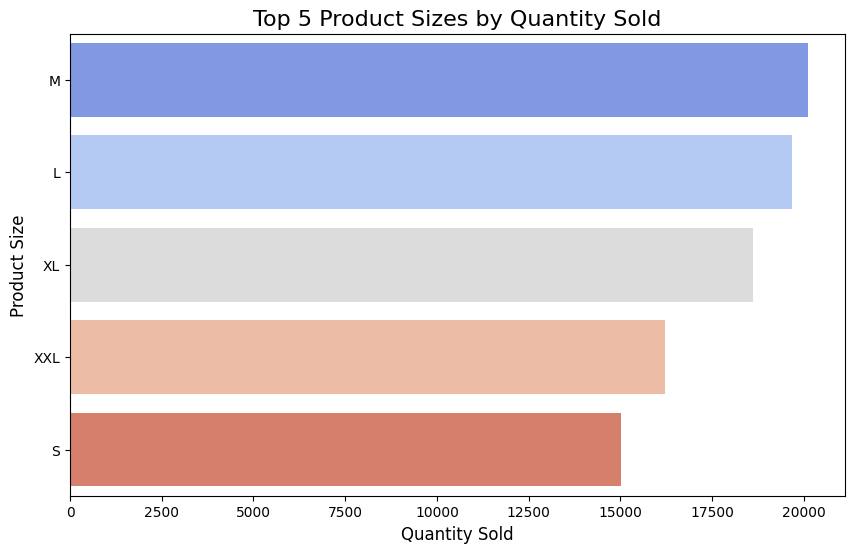

In [12]:
# Top 5 categories by sales
top_categories = data.groupby('Category')['Order_Amount_with_Tax'].sum().sort_values(ascending=False).head(5)

# Plot categories
plt.figure(figsize=(10, 6))
sns.barplot(x=top_categories.values, y=top_categories.index, palette="viridis")
plt.title("Top 5 Categories by Sales", fontsize=16)
plt.xlabel("Total Sales (with Tax)", fontsize=12)
plt.ylabel("Category", fontsize=12)
plt.show()

# Top 5 products by quantity
top_products = data.groupby('Size')['Qty'].sum().sort_values(ascending=False).head(5)

# Plot product sizes
plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.values, y=top_products.index, palette="coolwarm")
plt.title("Top 5 Product Sizes by Quantity Sold", fontsize=16)
plt.xlabel("Quantity Sold", fontsize=12)
plt.ylabel("Product Size", fontsize=12)
plt.show()




 Fulfillment Analysis

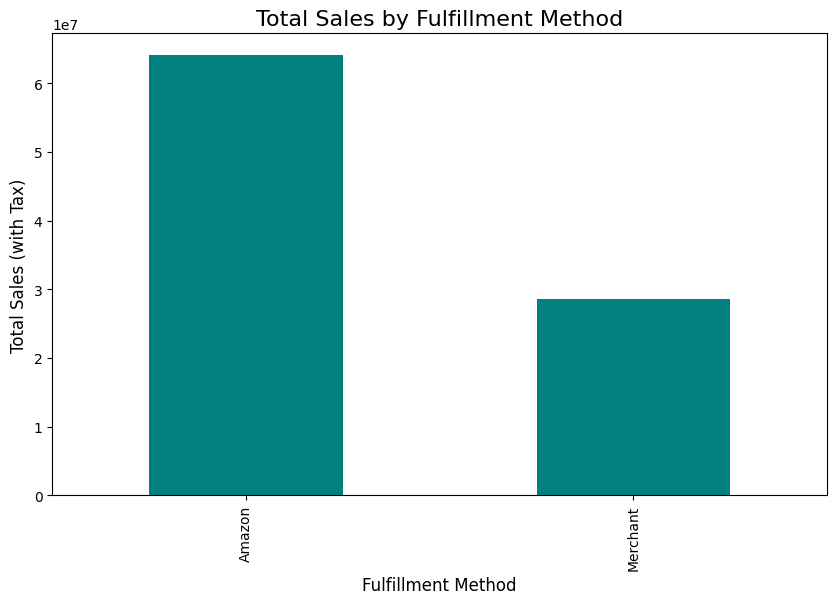

In [13]:
# Fulfillment method sales
fulfillment_analysis = data.groupby('Fulfilment')['Order_Amount_with_Tax'].sum()

# Plot fulfillment methods
plt.figure(figsize=(10, 6))
fulfillment_analysis.plot(kind='bar', color='teal')
plt.title("Total Sales by Fulfillment Method", fontsize=16)
plt.xlabel("Fulfillment Method", fontsize=12)
plt.ylabel("Total Sales (with Tax)", fontsize=12)
plt.show()


Geographical Analysis:Sales distribution by states.

C:\Users\kshit\AppData\Local\Temp\ipykernel_28168\1994247348.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_state.values, y=sales_by_state.index, palette="coolwarm")


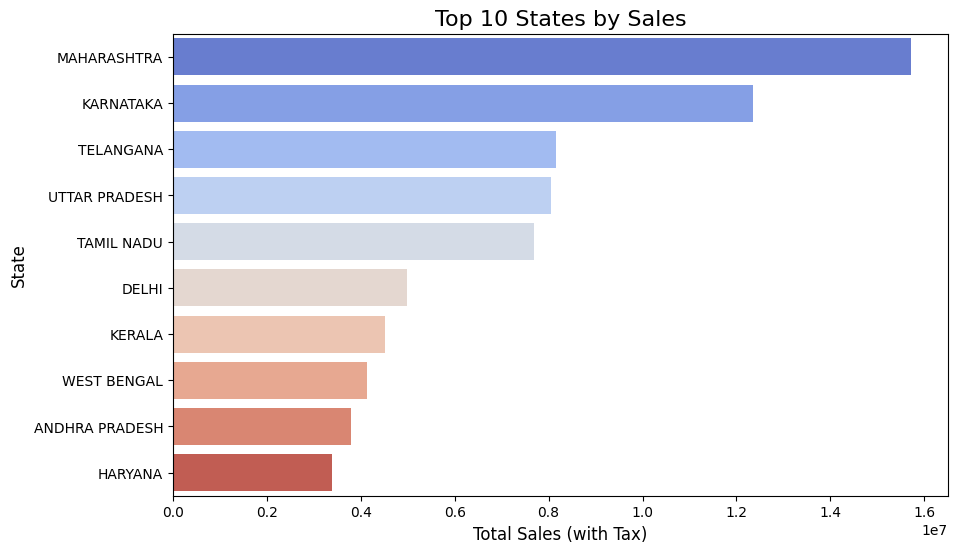

In [14]:
# Total sales by state
sales_by_state = data.groupby('ship-state')['Order_Amount_with_Tax'].sum().sort_values(ascending=False).head(10)

# Plot states
plt.figure(figsize=(10, 6))
sns.barplot(x=sales_by_state.values, y=sales_by_state.index, palette="coolwarm")
plt.title("Top 10 States by Sales", fontsize=16)
plt.xlabel("Total Sales (with Tax)", fontsize=12)
plt.ylabel("State", fontsize=12)
plt.show()


Analyze Order Status

Cancellation Rates

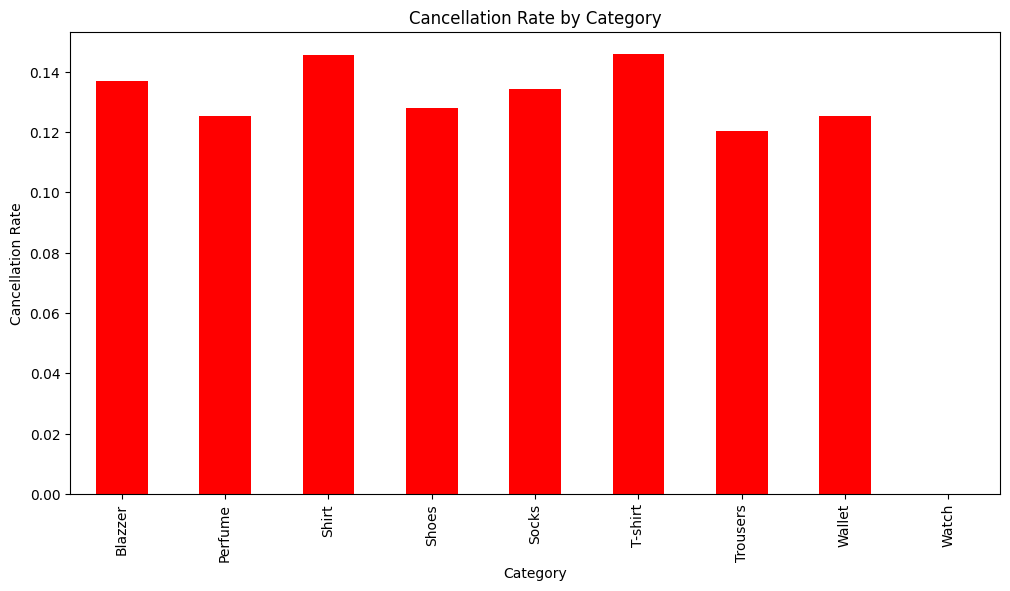

In [15]:
# Cancellation rate by category
cancel_rate = data[data['Status'] == 'Cancelled'].groupby('Category')['Order ID'].count() / data.groupby('Category')['Order ID'].count()

# Plot cancellation rates
plt.figure(figsize=(12, 6))
cancel_rate.plot(kind='bar', color='red', title='Cancellation Rate by Category')
plt.ylabel('Cancellation Rate')
plt.show()


ML for Predictive Analysis

In [16]:
#Split Data into Training and Testing Sets
# Train-test split (e.g., 80% train, 20% test)
train_size = int(len(sales_daily) * 0.8)
train_data = sales_daily[:train_size]
test_data = sales_daily[train_size:]


NameError: name 'sales_daily' is not defined

Classification Model for Order Status

In [ ]:
#Preprocess Data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Define features and target variable
X = data[['Category', 'Size', 'Fulfilment', 'Sales Channel', 'Qty', 'Amount']]
y = data['Status'].apply(lambda x: 1 if x == 'Cancelled' else 0)  # Binary classification: Cancelled=1, Fulfilled=0

# One-hot encode categorical variables
X = pd.get_dummies(X, columns=['Category', 'Size', 'Fulfilment', 'Sales Channel'], drop_first=True)

# Scale numerical variables
scaler = StandardScaler()
X[['Qty', 'Amount']] = scaler.fit_transform(X[['Qty', 'Amount']])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
#Train Classification Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

# Train a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)
y_proba = rf_model.predict_proba(X_test)[:, 1]

# Evaluate model performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_proba))


Accuracy: 0.9546230882695443
F1-Score: 0.8157604412923561
AUC-ROC: 0.8930400308221556


Clustering for Customer Segmentation

In [ ]:
#Prepre Data
from sklearn.preprocessing import StandardScaler

# Select features for clustering
clustering_features = data[['Qty', 'Order_Amount_with_Tax']]
clustering_features = clustering_features.fillna(0)  # Handle missing values

# Scale features
scaler = StandardScaler()
clustering_features_scaled = scaler.fit_transform(clustering_features)


In [ ]:
# Apply K-Means Clustering
from sklearn.cluster import KMeans

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(clustering_features_scaled)

# Add cluster labels to the original data
data['Cluster'] = clusters


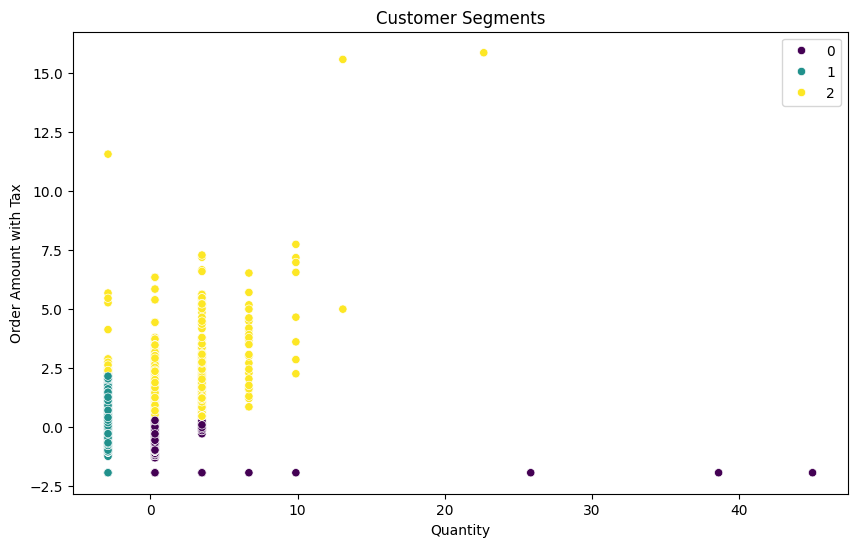

In [ ]:
#Visualize Clusters
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=clustering_features_scaled[:, 0], y=clustering_features_scaled[:, 1], hue=clusters, palette='viridis')
plt.title("Customer Segments")
plt.xlabel("Quantity")
plt.ylabel("Order Amount with Tax")
plt.show()
